In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.misc import comb
import scipy as scp
import numpy as np
import matplotlib.pyplot as pl
import pickle as pkl
import sets
import random
import itertools
import os,sys,fnmatch
import timeit
import scipy.stats
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

/home/chenani/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: the sets module is deprecated


In [2]:
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
        supplied root directory.
    '''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield [path,filename]

In [3]:
prLeftList = [os.path.join(item[0],item[1])for item in locate('*Left.ro','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/')]
prRightList = [os.path.join(item[0],item[1])for item in locate('*Right.ro','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/')]
prAllList = [os.path.join(item[0],item[1])for item in locate('*All.ro','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/')]
lprLeftList = [os.path.join(item[0],item[1])for item in locate('*Left.lro','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/')]
lprRightList = [os.path.join(item[0],item[1])for item in locate('*Right.lro','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/')]
lprAllList = [os.path.join(item[0],item[1])for item in locate('*All.lro','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/')]
lprLeftList,prAllList

(['/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat434Lesion/dataFiles/3838D4Left.lro',
  '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat434Lesion/dataFiles/3837D3Left.lro',
  '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat434Lesion/dataFiles/3837D1Left.lro',
  '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat434Lesion/dataFiles/3838D2Left.lro',
  '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat434Lesion/dataFiles/434D1Left.lro',
  '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3656Lesion/dataFiles/3656D1Left.lro',
  '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat405Lesion/dataFiles/405D1Left.lro'],
 ['/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3661Control/dataFiles/3661D2All.ro',
  '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat

In [4]:
cbins = np.arange(-1,1.01,0.05)
ccenters = [item + 0.025 for item in cbins[:-1]]
corrsL = []
lcorrsL = []
corrsR = []
lcorrsR = []
for pr in prLeftList:
    corrsL.extend(pkl.load(open(pr,'rb')))
for pr in lprLeftList:
    lcorrsL.extend(pkl.load(open(pr,'rb')))
for pr in prRightList:
    corrsR.extend(pkl.load(open(pr,'rb')))
for pr in lprRightList:
    lcorrsR.extend(pkl.load(open(pr,'rb')))

# Probability Distribution (one template)

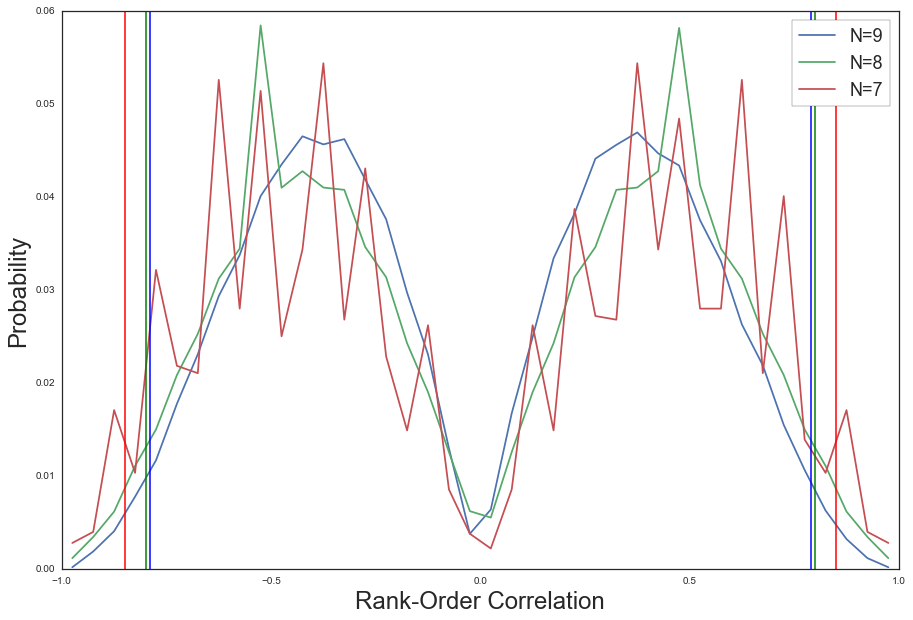

In [5]:
sns.set_style("white",{ 'legend.frameon': True})
f,ax = pl.subplots(1,1,figsize=[15,10])
crr9 = pkl.load(open('corr9.crr','rb'))
crr8 = pkl.load(open('corr8.crr','rb'))
crr7 = pkl.load(open('corr7.crr','rb'))
hst9 = np.histogram(crr9,bins=cbins)[0]
hst8 = np.histogram(crr8,bins=cbins)[0]
hst7 = np.histogram(crr7,bins=cbins)[0]
p9 = (hst9/(1.0*hst9.sum()))
p8 = (hst8/(1.0*hst8.sum()))
p7 = (hst7/(1.0*hst7.sum()))
pl.plot(ccenters,p9,label='N=9')
pl.plot(ccenters,p8,label='N=8')
pl.plot(ccenters,p7,label='N=7')
pl.axvline(0.85,linewidth = 1.5,color='r')
pl.axvline(-0.85,linewidth = 1.5,color='r')
pl.axvline(0.8,linewidth = 1.5,color='g')
pl.axvline(-0.8,linewidth = 1.5,color='g')
pl.axvline(0.79,linewidth = 1.5,color='b')
pl.axvline(-0.79,linewidth = 1.5,color='b')
pl.xlabel('Rank-Order Correlation',fontsize=24)
pl.ylabel('Probability',fontsize=24)
pl.legend(fontsize=18);

# Comparison with data

NameError: name 'corrs' is not defined

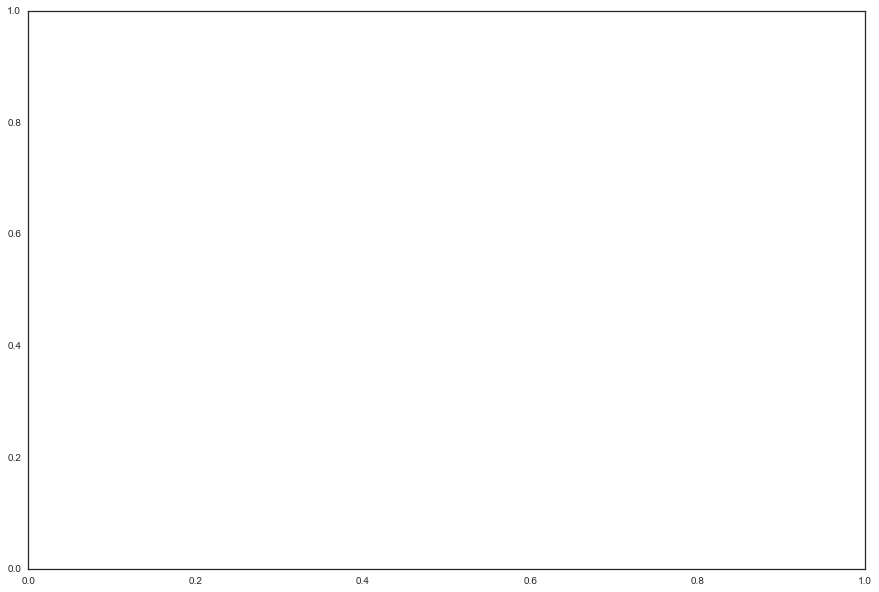

In [6]:
f,ax = pl.subplots(1,1,figsize=[15,10])
pl.hist([crr9,corrs,lcorrs],bins=cbins,normed=True,label=['Surrogate','Control','Lesion'],
        color = sns.color_palette("Paired")[:3]);
pl.axvline(0.8,linewidth = 2,label='N=9 sig level')
pl.axvline(-0.8,linewidth = 2)
pl.xlabel('Rank-Order Correlation',fontsize=24)
pl.ylabel('Normalized count',fontsize=24)
pl.legend(fontsize=18,loc=2);

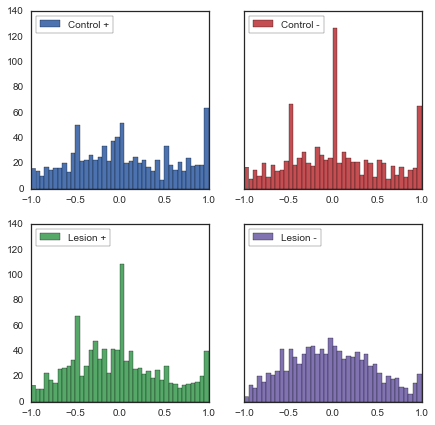

In [7]:
f,((ax,bx),(cx,dx)) = pl.subplots(2,2,figsize=[7,7],sharey=True)
ax.hist([corrsL],40,label=['Control +'],normed=False,color=sns.color_palette('deep')[0]);
bx.hist([corrsR],40,label=['Control -'],normed=False,color=sns.color_palette('deep')[2]);
cx.hist([lcorrsL],40,label=['Lesion +'],normed=False,color=sns.color_palette('deep')[1]);
dx.hist([lcorrsR],40,label=['Lesion -'],normed=False,color=sns.color_palette('deep')[3]);
ax.set_xlim([-1,1])
ax.legend(loc=2);
bx.legend(loc=2);
cx.legend(loc=2);
dx.legend(loc=2);

# Probability Distribution (two templates)

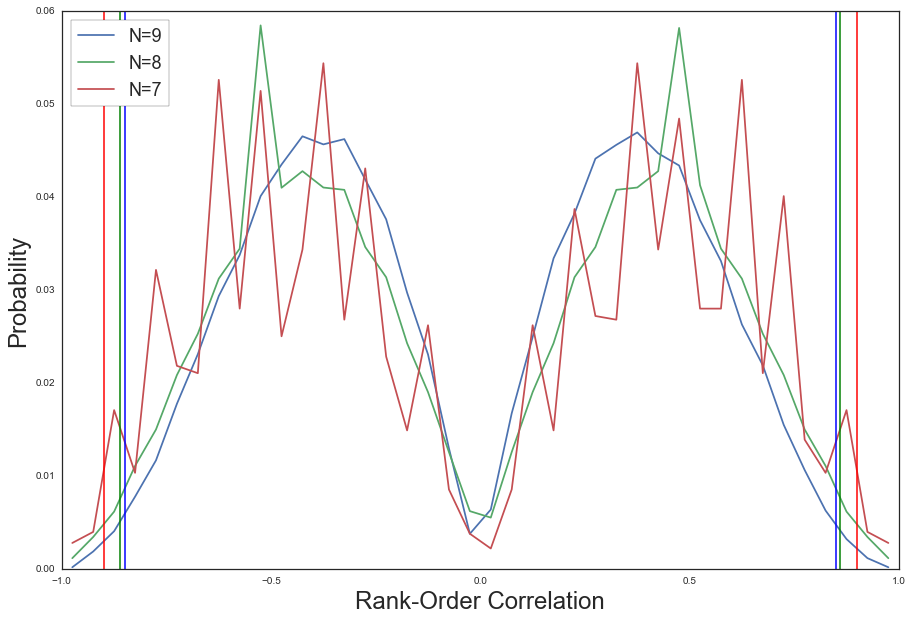

In [8]:
f,ax = pl.subplots(1,1,figsize=[15,10])
crr92 = pkl.load(open('corr9.crr2','rb'))
crr82 = pkl.load(open('corr8.crr2','rb'))
crr72 = pkl.load(open('corr7.crr2','rb'))
hst92 = np.histogram(crr92,bins=cbins)[0]
hst82 = np.histogram(crr82,bins=cbins)[0]
hst72 = np.histogram(crr72,bins=cbins)[0]
p92 = (hst92/(1.0*hst92.sum()))
p82 = (hst82/(1.0*hst82.sum()))
p72 = (hst72/(1.0*hst72.sum()))
pl.plot(ccenters,p92,label='N=9')
pl.plot(ccenters,p82,label='N=8')
pl.plot(ccenters,p72,label='N=7')
pl.axvline(0.85,linewidth = 1.5)
pl.axvline(-0.85,linewidth = 1.5)
pl.axvline(0.86,linewidth = 1.5,color='g')
pl.axvline(-0.86,linewidth = 1.5,color='g')
pl.axvline(0.9,linewidth = 1.5,color='r')
pl.axvline(-0.9,linewidth = 1.5,color='r')
pl.xlabel('Rank-Order Correlation',fontsize=24)
pl.ylabel('Probability',fontsize=24)
pl.legend(fontsize=18,loc=2);

# Comparioson with data

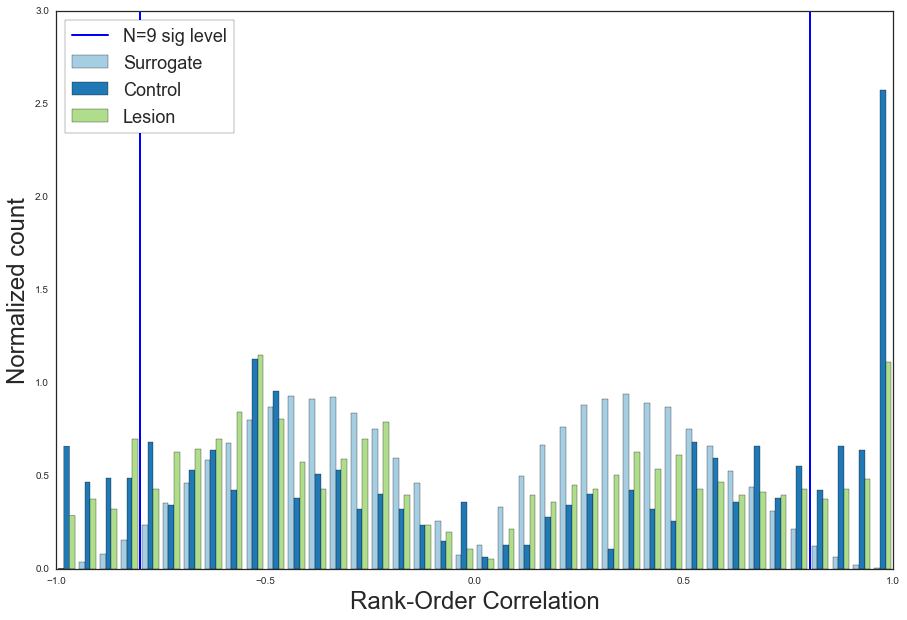

In [9]:
corrs = []
lcorrs = []
for pr in prAllList:
    corrs.extend(pkl.load(open(pr,'rb')))
for pr in lprAllList:
    lcorrs.extend(pkl.load(open(pr,'rb')))
    
f,ax = pl.subplots(1,1,figsize=[15,10])
pl.hist([crr92,corrs,lcorrs],bins=cbins,normed=True,label=['Surrogate','Control','Lesion'],
        color = sns.color_palette("Paired")[:3]);
pl.axvline(0.8,linewidth = 2,label='N=9 sig level')
pl.axvline(-0.8,linewidth = 2)
pl.xlabel('Rank-Order Correlation',fontsize=24)
pl.ylabel('Normalized count',fontsize=24)
pl.legend(fontsize=18,loc=2);

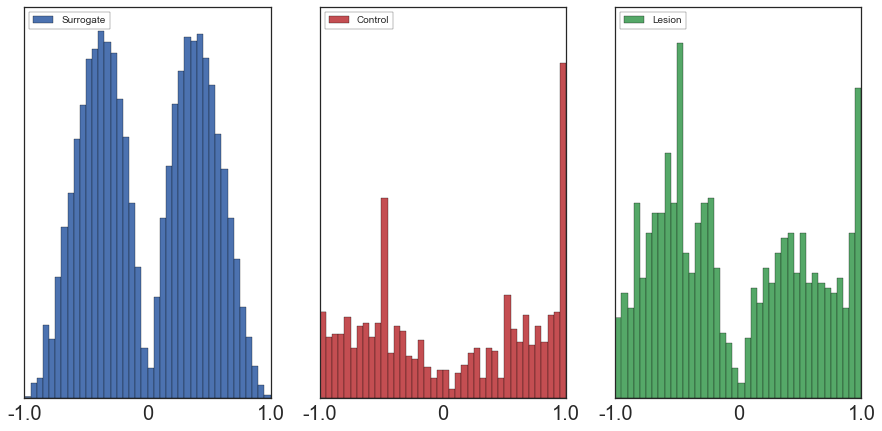

In [16]:
f,(ax,bx,cx) = pl.subplots(1,3,figsize=[15,7],sharey=False)
ax.hist([crr92],40,label=['Surrogate'],normed=True,color=sns.color_palette('deep')[0]);
bx.hist([corrs],40,label=['Control'],normed=True,color=sns.color_palette('deep')[2]);
cx.hist([lcorrs],40,label=['Lesion'],normed=True,color=sns.color_palette('deep')[1]);
ax.set_xticks([-1.0,0,1.0])
ax.set_xticklabels([-1.0,0,1.0],fontsize=20)
bx.set_xticks([-1.0,0,1.0])
bx.set_xticklabels([-1.0,0,1.0],fontsize=20)
cx.set_xticks([-1.0,0,1.0])
cx.set_xticklabels([-1.0,0,1.0],fontsize=20)
ax.set_xlim([-1,1])
ax.set_yticks([])
bx.set_yticks([])
cx.set_yticks([])
ax.legend(loc=2);
bx.legend(loc=2);
cx.legend(loc=2);
f.savefig('/home/chenani/ownCloud/Plots/BCCN-poster/RnakOrder.svg',transparent=True)

In [18]:
ahist,bins = np.histogram([crr92],40,normed=True);
bhist,bins = np.histogram([corrs],40,normed=True);
chist,bins = np.histogram([lcorrs],40,normed=True);
acdf = np.cumsum(ahist)
bcdf = np.cumsum(bhist)
ccdf = np.cumsum(chist)

[]

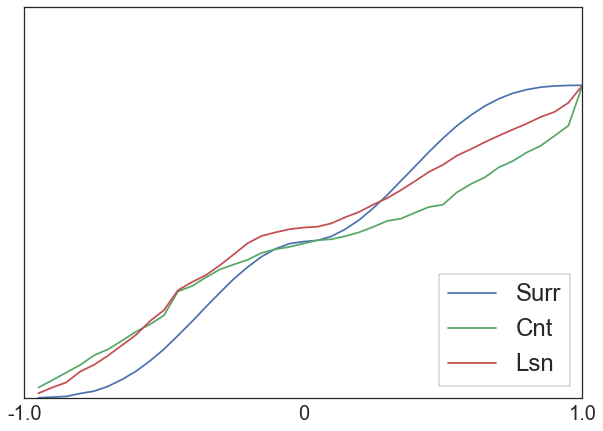

In [25]:
f,ax = pl.subplots(1,1,figsize=[10,7],sharey=False)
ax.plot(bins[1:],acdf,label = 'Surr')
ax.plot(bins[1:],bcdf,label='Cnt')
ax.plot(bins[1:],ccdf,label ='Lsn')
ax.legend(loc=4,fontsize=24)
ax.set_xticks([-1.0,0,1.0])
ax.set_xticklabels([-1.0,0,1.0],fontsize=20)
ax.set_yticks([])


In [49]:
from scipy.stats import ks_2samp,kstest
ks_2samp(corrs,lcorrs)

Ks_2sampResult(statistic=0.13376420346221307, pvalue=1.919992672554133e-08)

In [52]:
kstest(crr7,'norm')

KstestResult(statistic=0.20539649549177855, pvalue=4.1336804183214826e-185)

In [169]:
pSum = 0
for ii,pp in enumerate(p72):
    pSum+=pp
    if pSum > 0.0125:
        break;
print cbins[ii]

-0.9


In [86]:
x = np.random.randn(500000)
y = np.random.randn(10)
kstest(y,'norm')

KstestResult(statistic=0.183455176649018, pvalue=0.88944135218388864)

In [87]:
nrn,bins = np.histogram(x/4.0,bins,normed=True)

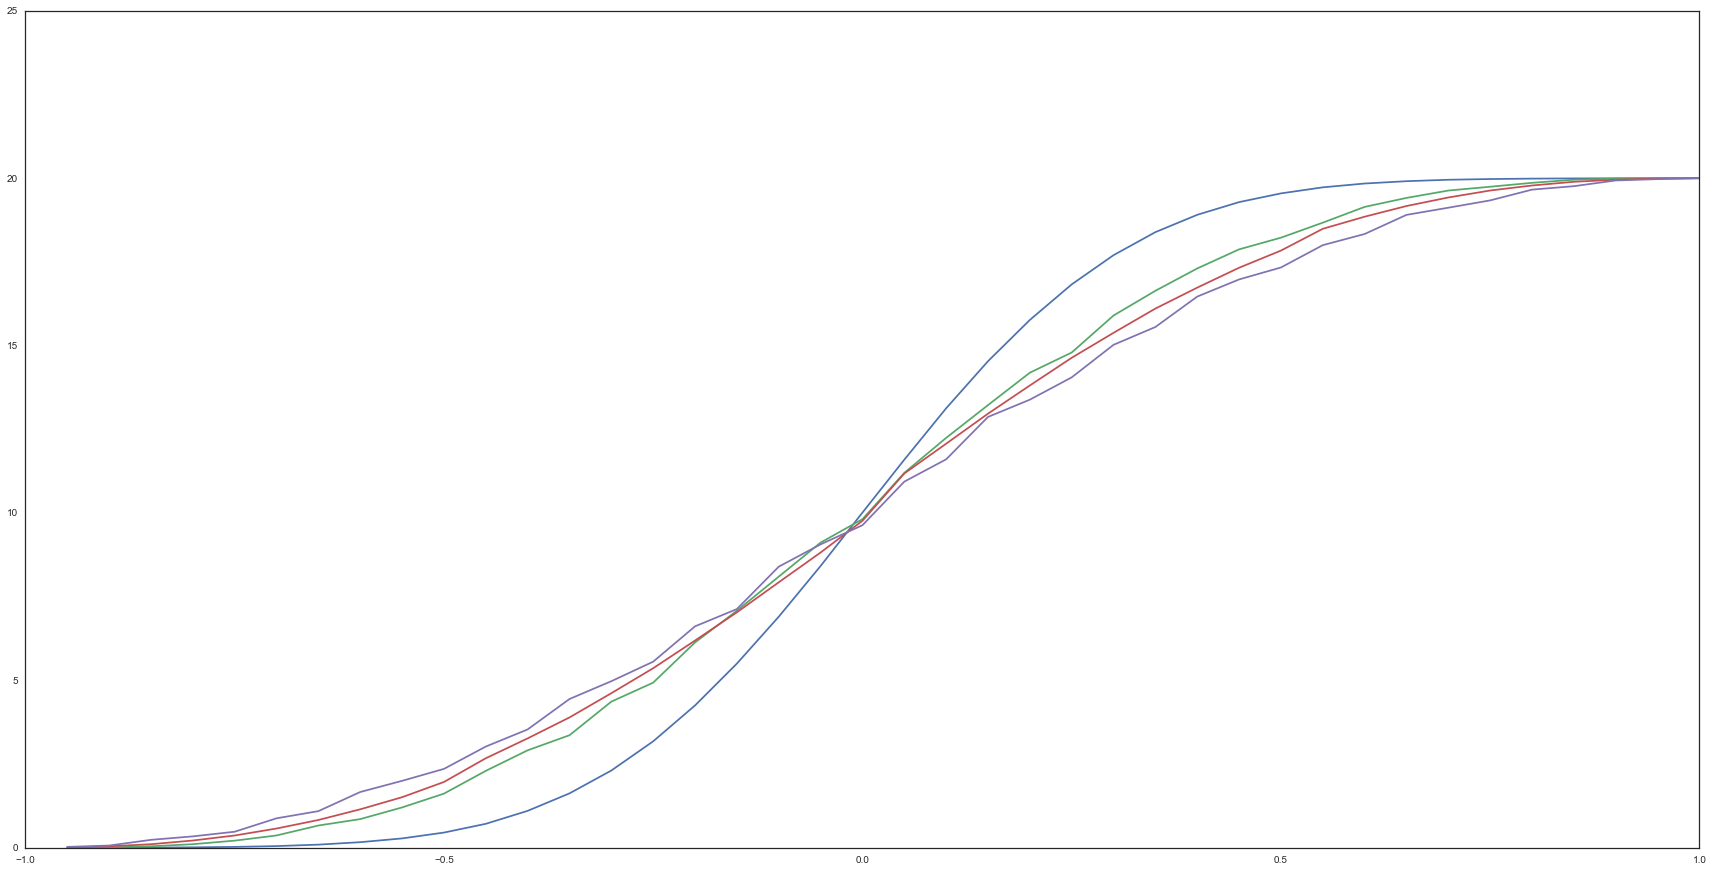

In [92]:
fig,ax = pl.subplots(1,1,figsize=[30,15])
pl.plot(bins[1:],np.cumsum(nrn))
pl.plot(bins[1:],np.cumsum(np.histogram(crr9,bins,normed=True)[0]))
pl.plot(bins[1:],np.cumsum(np.histogram(crr8,bins,normed=True)[0]))
pl.plot(bins[1:],np.cumsum(np.histogram(crr7,bins,normed=True)[0]))

(347252023.63561106, -6588.630867956721, 1.897362838016872e-05)
(3.9366225185177353, 3.9355948464246531, -1.054380632358185, 2.1084839236655086)
(-2.7557395164560141e-06, 0.35354998051241487)


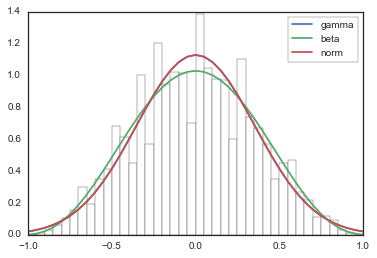

In [126]:
h = pl.hist(crr9, bins=bins, color='w',normed=True)
dist_names = ['gamma', 'beta', 'norm']

for dist_name in dist_names:
    dist = getattr(scp.stats, dist_name)
    param = dist.fit(crr9)
    print param
    pdf_fitted = dist.pdf(bins, *param[:-2], loc=param[-2], scale=param[-1])
    pl.plot(bins,pdf_fitted, label=dist_name)
#pl.xlim(-1,1)
#pl.ylim(0,5e3)
pl.legend(loc='upper right')
pl.show()

In [138]:
r = scp.stats.beta.rvs(3.9366225185177353, 3.9355948464246531, -1.054380632358185, 2.1084839236655086, size=1e5)

/home/chenani/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:374: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._random_state.beta(a, b, self._size)
/home/chenani/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [142]:
ks_2samp(crr8,r)

Ks_2sampResult(statistic=0.026308492063492062, pvalue=1.0043019313495611e-17)

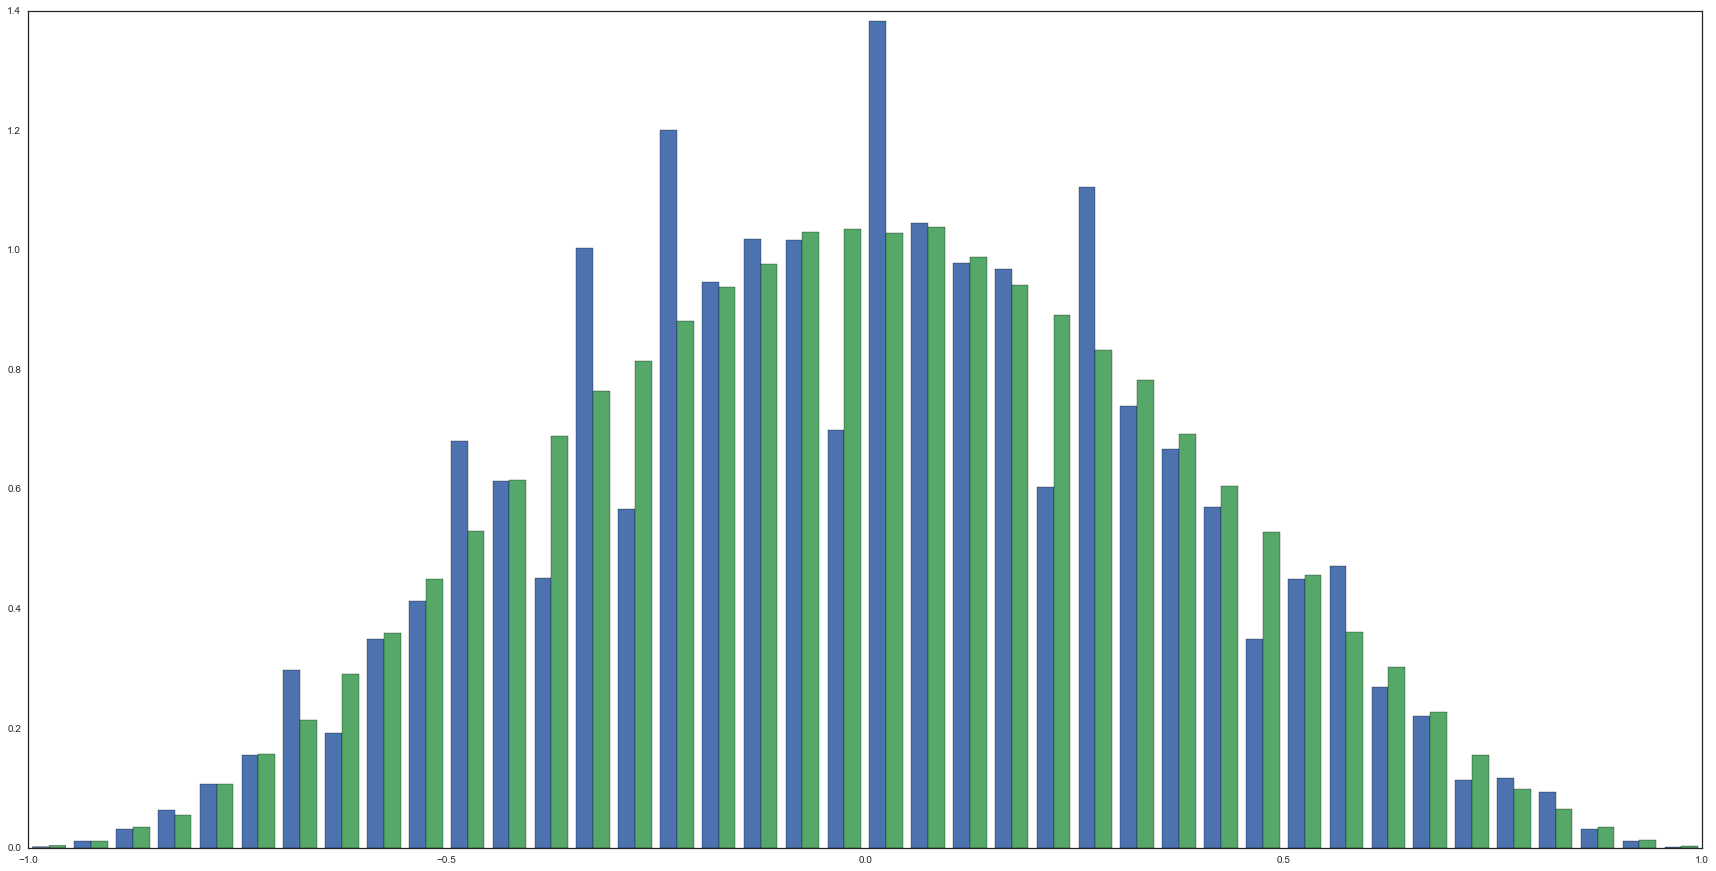

In [143]:
fig,ax = pl.subplots(1,1,figsize=[30,15])
pl.hist([crr9,r],bins,normed=True);